In [72]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time

In [130]:
def convert_date(unixtime):
    ms = unixtime%1000000000
    dt = datetime.fromtimestamp(unixtime // 1000000000)
    return dt,ms

def day_array(data):
    times = []
    for dat in data:
        times.append(datetime.fromtimestamp(dat// 1000000000))
    return times

def make_date(d,m,y):
    s="{:02d}/{:02d}/{:04d}".format(d,m,y)
    return time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple())*1000000000

def chop_data(data):
    idx = []
    flag = 1
    for i,dat in enumerate(data):
        tmp = datetime.fromtimestamp(dat // 1000000000)
        if tmp.hour >= 8  and flag == 1:
            #print(i,end="\r")
            idx.append(i)
            flag = 0
        elif tmp.hour < 8:
            flag = 1
    return idx


In [123]:
data = np.load("../stat_data.npy")
raw = np.load("../data.npy")

In [124]:
#remove nan data
idx = np.isnan(data[:,-1])==False
hrv = data[idx][:,[0,-1]]
idx = np.where(hrv[:,1] > 0)
hrv = hrv[idx]

idx = np.isnan(raw[:,-2])==False
ppg = raw[idx][:,[0,-2]]

In [82]:
days = []
dt, _ = convert_date(ppg[0,0])
for i in range(12):
    days.append(make_date(dt.day+i,dt.month,dt.year))
graph = np.append(np.ones(len(days)),np.ones(len(days))*40)
days = days + days

In [125]:
len(hrv)

725

In [131]:
hrv_days = day_array(hrv[:,0])
hrv_dat = hrv[:,1]
idx = chop_data(hrv[:,0])

print(idx)
#idx = chop_data(hrv[:,0])

[9, 64, 142, 222, 293, 352, 416, 486, 550, 619, 679]


In [137]:
ppg_days = day_array(ppg[:,0])
ppg_dat = ppg[:,1]
idx = chop_data(ppg[:,0])

print(idx)
#idx = chop_data(hrv[:,0])

[113371, 364856, 738840, 1223253, 1615384, 1946766, 2297520, 2654650, 2971908, 3343312, 3707033]


<IPython.core.display.Javascript object>


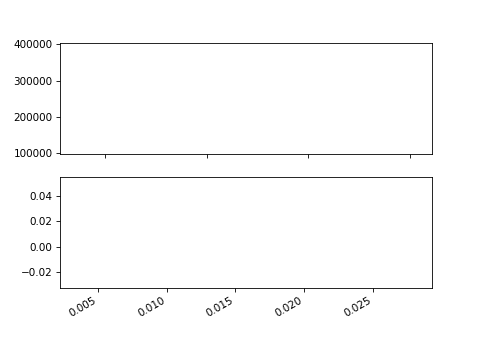

In [138]:
plt.subplot(2,1,1)
cut_ppg_times = []
cut_ppg_dat = []
for i in range(len(idx)-1):
    cut_ppg_times.append(ppg_days[idx[i]:idx[i+1]])
    cut_ppg_dat.append(ppg_dat[idx[i]:idx[i+1]])
cut_hrv_times.append(ppg_days[idx[-1]:])
cut_hrv_dat.append(ppg_dat[idx[-1]:])
plt.plot(cut_ppg_times[-1],cut_ppg_dat[-1])
plt.gcf().autofmt_xdate()


plt.subplot(2,1,2)
cut_hrv_times = []
cut_hrv_dat = []
for i in range(len(idx)-1):
    cut_hrv_times.append(hrv_days[idx[i]:idx[i+1]])
    cut_hrv_dat.append(hrv_dat[idx[i]:idx[i+1]])
    
cut_hrv_times.append(hrv_days[idx[-1]:])
cut_hrv_dat.append(hrv_dat[idx[-1]:])
plt.gcf().autofmt_xdate()


<IPython.core.display.Javascript object>


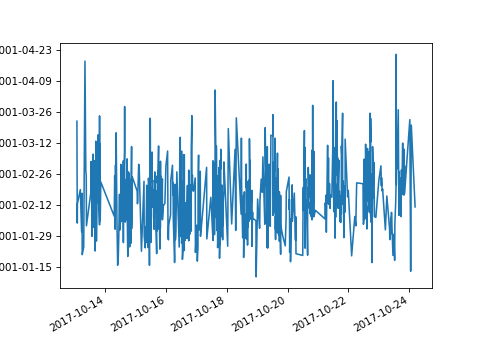

In [112]:
for i in range(len(cut_ppg_times)):
    plt.plot(cut_ppg_times[i],cut_ppg_dat[i])

<IPython.core.display.Javascript object>


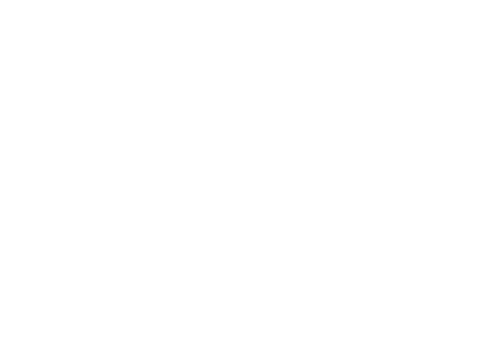

In [101]:
plot_days = []
for i in range(len(idx)-1):
    plot_days.append(hrv[idx[i]:idx[i+1],:])
    plt.plot(plot_days[i][:,0],plot_days[i][:,1])
plot_days.append(hrv[idx[-1]:,:])
plt.plot(plot_days[-1][:,0],plot_days[-1][:,1])

In [100]:
convert_date(hrv[0,0])
#plt.subplot(1,1,1)
#plt.plot(ppg[:,0],ppg[:,-1])
#plt.subplot(1,1,1)
#plt.plot(hrv[:,0],hrv[:,-1],'*')
#plt.plot(plot_days[1][:,0],plot_days[1][:,1])
#plt.plot(plot_days[4][:,0],plot_days[4][:,1])
#plt.plot(ppg[idx,0],np.ones(len(idx)),'*')
#plt.xlim()

(datetime.datetime(2017, 10, 13, 1, 27, 27), 0.0)

In [ ]:
dt,ms = convert_date(ppg[0,0])
dt

In [101]:
tmp = make_date(dt.day,dt.month,dt.year)
dt,ms = convert_date(tmp)
dt

datetime.datetime(2017, 10, 23, 0, 0)